In [1]:
import sys,os
import numpy as np
from scipy import linalg
from sklearn.preprocessing import OneHotEncoder
#from scipy.sparse import csr_matrix
#import Bio
import matplotlib.pyplot as plt

In [2]:
# setting parameter:

np.random.seed(1)

n = 10 # number of positions
m = 3 # number of values at each position
l = 1000 # number of samples

(30, 30)


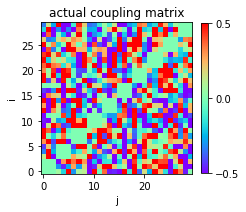

In [3]:
# generate coupling matrix w0:

g = 2.
nm = n*m
w0 = np.random.normal(0.0,g/np.sqrt(nm),size=(nm,nm))
print(w0.shape)

# no self-interaction:
for i in range(n):
    i1 = i*m
    i2 = (i+1)*m 
    w0[i1:i2,i1:i2] = 0.

# symmetry interaction
for i in range(nm):
    for j in range(nm):
        if j > i: w0[i,j] = w0[j,i]

for i in range(n):
    i1 = i*m
    i2 = (i+1)*m 
    w0[i1:i2,:] = w0[i1:i2,:] - w0[i1:i2,:].sum(axis=0)
            
plt.figure(figsize=(3,3))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])
plt.show()

In [4]:
# generate sequences:
def generate_sequences(w,n,m,l): 
        
    # initial s
    s_ini = np.random.randint(0,m,size=(l,n))
    #print(s_ini)
    
    # onehot encoder
    enc = OneHotEncoder(n_values=m)
    #s = csr_matrix(enc.fit_transform(s_ini)).toarray()
    s = enc.fit_transform(s_ini).toarray()
    #print(s)
    
    nflip = 100
    ntrial = 20
    for iflip in range(nflip):
        for i in range(n):
            i1 = i*m
            i2 = (i+1)*m   
            h = np.dot(s,w0.T)

            for t in range(l):                
                p1 = np.exp(h[t,i1:i2])
                #print(p1)
                p2 = p1.sum()
                p = p1/p2

                for itrial in range(ntrial):
                    k = np.random.randint(0,m)

                    if p[k] > np.random.rand():
                        s[t,i1:i2] = 0.
                        s[t,i1+k] = 1.

                        #print('flip',itrial,i,k,p[k])                  

                        break                         
    return s

s = generate_sequences(w0,n,m,l)
#print(s)                

In [5]:
nloop = 5

# w initial
W = np.random.normal(0.0,g/np.sqrt(nm),size=(nm,nm))
# no self-interaction:
for i in range(n):
    i1 = i*m
    i2 = (i+1)*m 
    W[i1:i2,i1:i2] = 0.

H = np.dot(s,W.T)

#print(H)
#print(H.shape)

# for i in range(n):
i = 0
i1 = i*m
i2 = (i+1)*m

# remove position i 
s1 = np.hstack([s[:,:i1],s[:,i2:]])
#print(s1)
s_av = s1.mean(axis=0)
ds = s1 - s_av

c = np.cov(ds,rowvar=False,bias=True)
c_inv = linalg.inv(c)
dst = ds.T    

h = H[:,i1:i2]

for iloop in range(nloop):
    h_av = h.mean(axis=0)
    dh = h - h_av

    # dhds[t,i,j] = dh[t,i]*ds[t,j]
    dhds = dh[:,:,np.newaxis]*ds[:,np.newaxis,:]
    dhds_av = dhds.mean(axis=0)

    w = np.dot(dhds_av,c_inv)
    #print(w)

    w = w - w.sum(axis=0)
        
    h = np.dot(s1,w.T)
    p1 = np.exp(h)
    #print(p1)

    p2 = p1.sum(axis=1)
    #print(p2)

    p = p1/p2[:,np.newaxis]
    #print(p)

    h += s[:,i1:i2] - p
    cost = np.mean((s[:,i1:i2]-p)**2,axis=0)
    print(iloop,cost)   
    

(0, array([0.35 ,   nan, 0.389]))
(1, array([nan, nan, nan]))
(2, array([nan, nan, nan]))
(3, array([nan, nan, nan]))
(4, array([nan, nan, nan]))


/home/tai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in divide


[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan]]


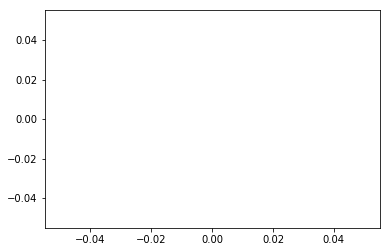

In [6]:
print(w)
wpred = np.zeros((nm,nm))
wpred[i1:i2,:i1] = w[:,:i1]
wpred[i1:i2,i2:] = w[:,i1:]

plt.scatter(w0[i1:i2,i2:],wpred[i1:i2,i2:])

In [ ]:
from inference_protein 

iterate3(seqs,w,b,index,n_iter=6)
